In [1]:
# This is the first part of the program following a guide by Joseph Lee Wei En on Medium. We build a neural network to predict home prices with Keras.
# Author: Victor Serur

In [2]:
# Imports the Pandas library

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('housepricedata.csv')

In [5]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
# Loads the dataset with X and Y values

In [7]:
dataset = df.values

In [8]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [9]:
X = dataset[:,0:10]

In [10]:
Y = dataset[:,10]

In [11]:
# Imports preprocessing method from the sklearn library

In [12]:
from sklearn import preprocessing

In [13]:
# Runs a scaler to transform X values 

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()

In [15]:
X_scale = min_max_scaler.fit_transform(X)

In [16]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [17]:
# Imports train test split model from sklearn library 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Produces X and Y train, X val and test values with test sizes of 0.3 and 0.5

In [20]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.3)

In [21]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [22]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [23]:
# Imports Sequential and Dense models from keras library 

In [24]:
from keras.models import Sequential

In [25]:
from keras.layers import Dense

In [26]:
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (10,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

C:\Users\victo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compiles models 

In [28]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
# Trains models and produces X and Y values for validation data 

In [30]:
hist = model.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6014 - loss: 0.6898 - val_accuracy: 0.5023 - val_loss: 0.6902
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5456 - loss: 0.6873 - val_accuracy: 0.5023 - val_loss: 0.6884
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5105 - loss: 0.6857 - val_accuracy: 0.5068 - val_loss: 0.6867
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5072 - loss: 0.6830 - val_accuracy: 0.5023 - val_loss: 0.6849
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 0.6811 - val_accuracy: 0.4977 - val_loss: 0.6832
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 0.6774 - val_accuracy: 0.5023 - val_loss: 0.6812
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5121 - loss: 0.6766 - val_accuracy: 0.5023 - val_loss: 0.6793
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4940 - loss: 0.6765 - val_accuracy: 0.5023 - v

In [31]:
# Evaluates models 

In [32]:
model.evaluate(X_test, Y_test)[1]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.2604 


0.913241982460022

In [33]:
# Imports matplot library 

In [34]:
import matplotlib.pyplot as plt

In [35]:
# Displays model loss for hist in a line graph

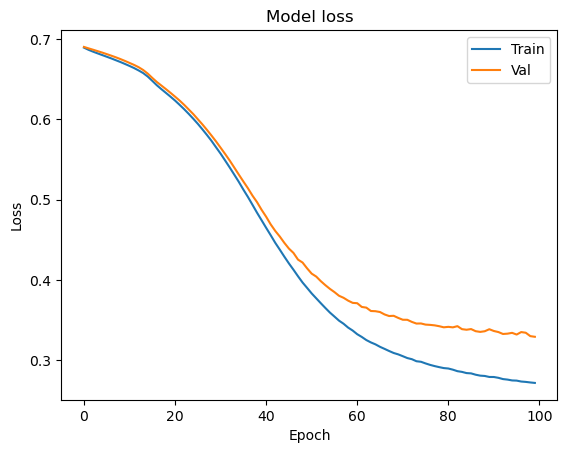

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [37]:
# Displays model accuracy for hist

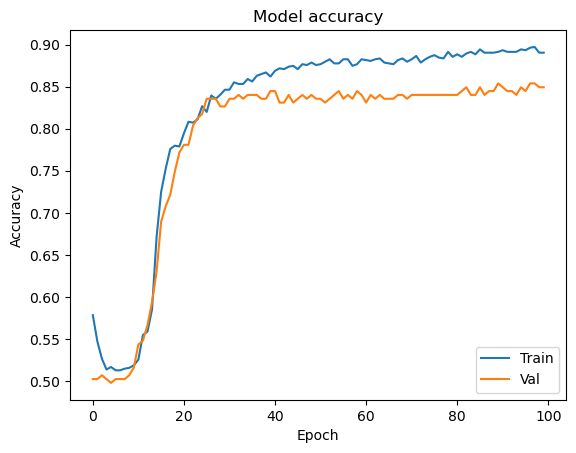

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [39]:
# Creates model 2 value, compiles second model and validates data 

In [40]:
model_2 = Sequential([
    Dense(1000, activation = 'relu', input_shape = (10,)),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist_2 = model_2.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100


C:\Users\victo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6229 - loss: 0.5658 - val_accuracy: 0.8311 - val_loss: 0.3913
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8610 - loss: 0.3432 - val_accuracy: 0.8356 - val_loss: 0.4168
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8497 - loss: 0.3364 - val_accuracy: 0.8174 - val_loss: 0.3775
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8722 - loss: 0.3016 - val_accuracy: 0.8493 - val_loss: 0.3845
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8649 - loss: 0.2869 - val_accuracy: 0.8584 - val_loss: 0.3388
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8951 - loss: 0.2407 - val_accuracy: 0.8584 - val_loss: 0.3491
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9109 - loss: 0.2326 - val_accuracy: 0.8493 - val_loss: 0.3264
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8939 - loss: 0.2581 - val_accuracy: 0.8584 - val_l

In [41]:
# Graph for model 2's accuracy 

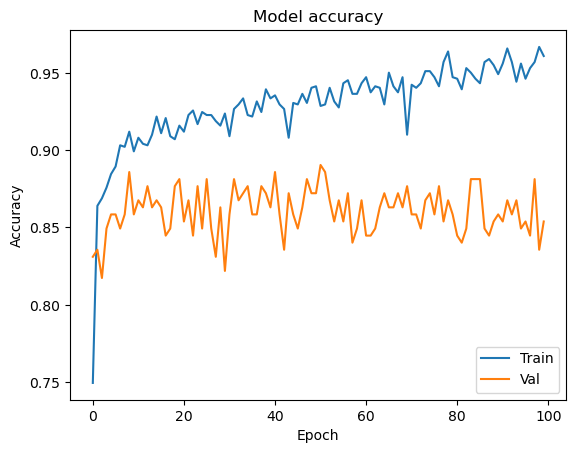

In [42]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [43]:
# Imports dropout and regularizer from keras library 

In [44]:
from keras.layers import Dropout

In [45]:
from keras import regularizers

In [46]:
# Creates a third model

In [47]:
model_3 = Sequential([
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])

In [48]:
# Compiles third model and trains validation data and establishes batch size 

In [49]:
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist_3 = model_3.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data = (X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5424 - loss: 21.1174 - val_accuracy: 0.7032 - val_loss: 3.9238
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7928 - loss: 2.5072 - val_accuracy: 0.8311 - val_loss: 0.6755
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8702 - loss: 0.5894 - val_accuracy: 0.8356 - val_loss: 0.5969
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8824 - loss: 0.5028 - val_accuracy: 0.8447 - val_loss: 0.5305
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8805 - loss: 0.4651 - val_accuracy: 0.8539 - val_loss: 0.5039
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8897 - loss: 0.4707 - val_accuracy: 0.8402 - val_loss: 0.5190
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8747 - loss: 0.4669 - val_accuracy: 0.8447 - val_loss: 0.5212
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8629 - loss: 0.4805 - val_accuracy: 0

In [50]:
# Graph for model loss for the third model 

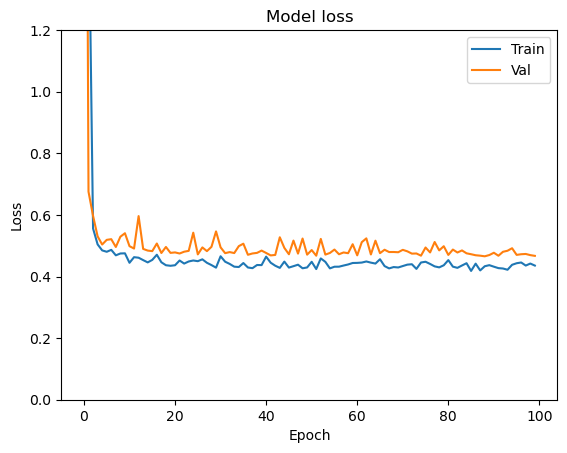

In [51]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.ylim(top = 1.2, bottom = 0)
plt.show()

In [52]:
# Model accuracy graph for the third model 

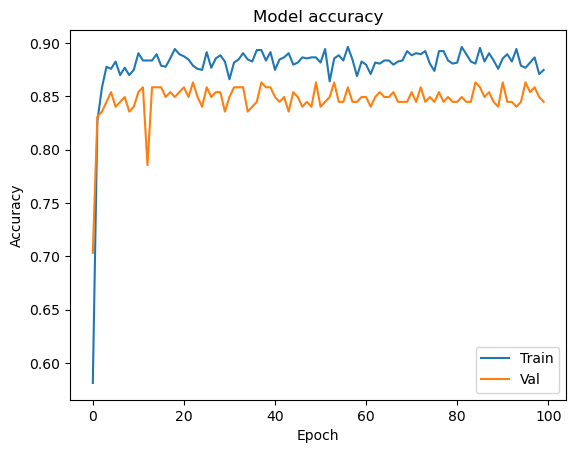

In [53]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [54]:
# This is the second part of the program. We use the neural networks to analyze images. The following program is based on a Medium article written by 
# Joseph Lee Wei En.
# Author: Victor Serur

In [55]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [57]:
# Prints out values for the x and y train 

In [58]:
print('x_train.shape: ', x_train.shape)

x_train.shape:  (50000, 32, 32, 3)


In [59]:
print('y_train shape: ', y_train.shape)

y_train shape:  (50000, 1)


In [60]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [61]:
# Imports pyplot from matplot library. Establishes two preset images.

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

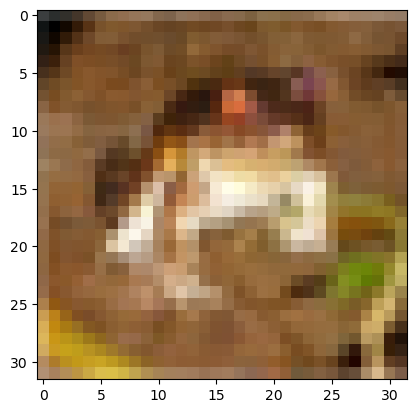

In [63]:
img = plt.imshow(x_train[0])

In [64]:
print('The label is: ', y_train[0])

The label is:  [6]


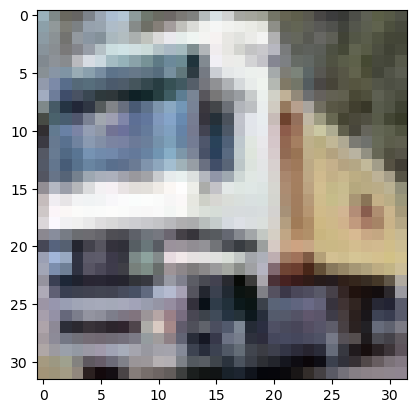

In [65]:
img = plt.imshow(x_train[1])

In [66]:
print('The label is: ', y_train[1])

The label is:  [9]


In [67]:
# Import keras library and trains X and Y values. 

In [68]:
import keras

In [69]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)

In [70]:
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [71]:
print('The one hot label is: ', y_train_one_hot[1])

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [72]:
x_train = x_train.astype('float32')

In [73]:
x_test = x_test.astype('float32')

In [74]:
x_train = x_train / 255

In [75]:
x_test = x_test / 255

In [76]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [77]:
# Imports Dense, Dropout, Flatten, Conv2D, MaxPooling2D from Keras library 

In [78]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [79]:
model = Sequential()

In [80]:
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))

C:\Users\victo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [81]:
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

In [82]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [83]:
model.add(Dropout(0.25))

In [84]:
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [85]:
model.add(Flatten())

In [86]:
model.add(Dense(512, activation = 'relu'))

In [87]:
model.add(Dropout(0.5))

In [88]:
model.add(Dense(10, activation = 'softmax'))

In [89]:
# Summarizes models from Keras libraries 

In [90]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Compiles and trains models 

In [92]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [93]:
hist = model.fit(x_train, y_train_one_hot, batch_size = 32, epochs = 20, validation_split = 0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 52s 39ms/step - accuracy: 0.3151 - loss: 1.8489 - val_accuracy: 0.5887 - val_loss: 1.1517
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.5755 - loss: 1.1816 - val_accuracy: 0.6683 - val_loss: 0.9415
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.6478 - loss: 0.9898 - val_accuracy: 0.6728 - val_loss: 0.9249
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 39ms/step - accuracy: 0.6821 - loss: 0.8880 - val_accuracy: 0.6995 - val_loss: 0.8637
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.7153 - loss: 0.8088 - val_accuracy: 0.7340 - val_loss: 0.7660
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 39ms/step - accuracy: 0.7452 - loss: 0.7252 - val_accuracy: 0.7475 - val_loss: 0.7287
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.7603 - loss: 0.6802 - val_accuracy: 0.7443 - val_loss: 0.7337
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.7812 -

In [94]:
# Displays graph for model loss and model accuracy for the trained model 

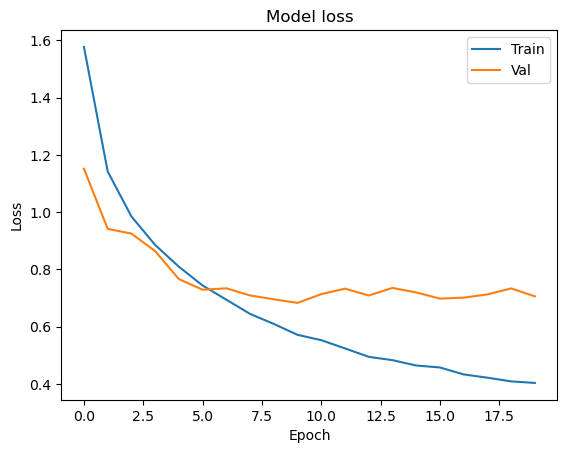

In [95]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

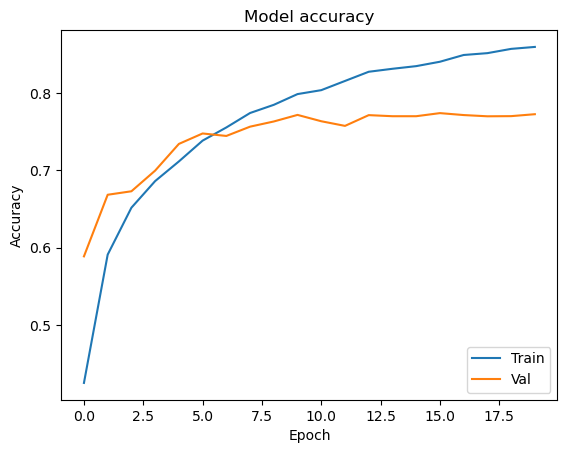

In [96]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [97]:
# Evaluates model 

In [98]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7647 - loss: 0.7388


0.7664999961853027

In [99]:
# Saves model my_cifar_model.h5 

In [100]:
model.save('my_cifar10_model.h5')

In [101]:
# Imports load_model from the keras library 

In [102]:
from keras.models import load_model
model = load_model('my_cifar10_model.h5')

In [103]:
# Creates a value for image

In [104]:
my_image = plt.imread("my_dog.jpg")

In [105]:
# Imports resize from the skimage library 

In [106]:
from skimage.transform import resize

In [107]:
# Resizes and displays the image 

In [108]:
my_image_resized = resize(my_image, (32, 32, 3))

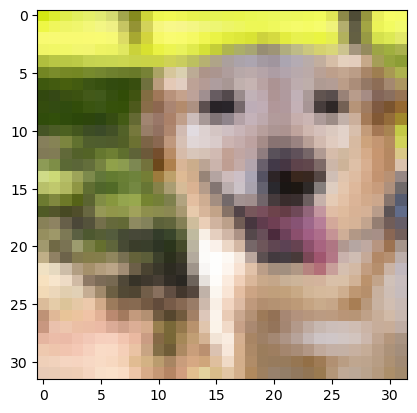

In [109]:
img = plt.imshow(my_image_resized)

In [110]:
# Imports the numpy library 

In [111]:
import numpy as np

In [112]:
# Probabilities value for predicting the model 

In [113]:
probabilities = model.predict(np.array([my_image_resized,]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [114]:
# Displays probabilities 

In [115]:
probabilities

array([[1.3764214e-04, 2.3713865e-05, 4.5144640e-02, 3.1828704e-01,
        1.6718650e-02, 6.0127795e-01, 6.2391292e-03, 1.2123437e-02,
        3.5174158e-05, 1.2608555e-05]], dtype=float32)

In [116]:
# Prints several different examples and prints most likely classes for each index variable

In [117]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer' 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class: ", number_to_class[index[9]], "-- Probability: ", probabilities[0, index[9]])
print("Second most likely class: ", number_to_class[index[8]], "-- Probability: ", probabilities[0, index[8]])
print("Third most likely class: ", number_to_class[index[7]], "-- Probability: ", probabilities[0, index[7]])
print("Fourth most likely class: ", number_to_class[index[6]], "-- Probability: ", probabilities[0, index[6]])
print("Fifth most likely class: ", number_to_class[index[5]], "-- Probability: ", probabilities[0, index[5]])

Most likely class:  frog -- Probability:  0.60127795
Second most likely class:  cat -- Probability:  0.31828704
Third most likely class:  bird -- Probability:  0.04514464
Fourth most likely class:  deerdog -- Probability:  0.01671865
Fifth most likely class:  ship -- Probability:  0.012123437
